<p>Fachhochschule Südwestfalen</p>
<p>Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SS2023)</p>
<p>Preisvorhersage von Gebrauchtwagen</p>
<p>Bearbeitet von Kevin Fitkau</p>
<p>31.07.2023</p>

# Inhaltsverzeichnis

**[1. Einleitung](#1.-Einleitung)**
<br>
**[2. Vorbereitung](#2.-Vorbereitung)**
<br>
**[3. Umsetzung](#3.-Umsetzung)**
<br>
**[3.1 Informationen über die Datensätze holen](#3.1-Informationen-über-die-Datensätze-holen)**
<br>
**[3.2 Kategoriale Merkmale umwandeln](##3.2-Kategoriale-Merkmale-umwandeln)**
<br>
**[3.3 Daten Visualisieren und mit Statistischen Kennwerten beschreiben](##3.3-Daten-Visualisieren-und-mit-Statistischen-Kennwerten-beschreiben)**
<br>
**[3.4 Daten selektieren und aufbereiten](##3.4-Daten-selektieren-und-aufbereiten)**
<br>
**[3.5 Lineare Regression](##3.5-Lineare-Regression)**
<br>
**[3.6 Random Forest](##3.6-Random-Forest)**
<br>
**[3.7 DecisionTreeRegressor](##3.7-DecisionTreeRegressor)**
<br>
**[3.8 Support Vector Regressor](##3.8-Support-Vector-Regressor)**
<br>
**[3.9 KNN Regressor](##3.9-KNN-Regressor)**
<br>
**[4. Hyperparameter Tuning](#4.-Hyperparameter-Tuning)**
<br>
**[4.1 GridSearch](##4.1-GridSearch)**
<br>
**[4.1.1 LinearRegression](###4.1.1-LinearRegression)**
<br>
**[4.1.2 Random Forest](###4.1.2-Random-Forest)**
<br>
**[4.1.3 DecisionTreeRegressor](###4.1.3-DecisionTreeRegressor)**
<br>
**[4.1.4 Support Vector Regressor](###4.1.4-Support-Vector-Regressor)**
<br>
**[4.1.5 KNN Regressor](###4.1.5-KNN-Regressor)**
<br>
**[4.2 Random Search](##4.2-Random-Search)**
<br>
**[4.2.1 LinearRegression](###4.2.1-LinearRegression)**
<br>
**[4.2.2 Random Forest](###4.2.2-Random-Forest)**
<br>
**[4.2.3 DecisionTreeRegressor](###4.2.3-DecisionTreeRegressor)**
<br>
**[4.2.4 Support Vector Regressor](###4.2.4-Support-Vector-Regressor)**
<br>
**[4.2.5 KNN Regressor](###4.2.5-KNN-Regressor)**
<br>
**[4.3 Bayesian optimization](##4.3-Bayesian-optimization)**
<br>
**[4.3.1 LinearRegression](###4.3.1-LinearRegression)**
<br>
**[4.3.2 Random Forest](###4.3.2-Random-Forest)**
<br>
**[4.3.3 DecisionTreeRegressor](###4.3.3-DecisionTreeRegressor)**
<br>
**[4.3.4 Support Vector Regressor](###4.3.4-Support-Vector-Regressor)**
<br>
**[4.3.5 KNN Regressor](###4.3.5-KNN-Regressor)**
<br>
**[5. Ergebnisse](#5.-Ergebnisse)**
<br>
**[6. Fazit und Ausblick](#6.-Fazit-und-Ausblick)**
<br>
**[7. Quellen](#7.-Quellen)**
<br>
**[8. Eidesstattliche Erklärung](#8.-Eidesstattliche-Erklärung)**

# 1. Einleitung

Der Gebrauchtwagenmarkt ist ein dynamischer und vielfältiger Sektor, der viele potenzielle Käufer und Verkäufer anspricht. Bei der Suche nach einem Gebrauchtwagen sind Verbraucher oft auf der Suche nach verlässlichen Informationen über Preise, Modelle und Hersteller. In diesem Zusammenhang habe ich mich in der Ausarbeitung beschäftigt, eine umfangreiche Sammlung von ausgelesenen Daten von Gebrauchtwagenangeboten zu analysieren.

Grundlage für diese Ausarbeitung ist der auf der Kaggle-Plattform verfügbare Datensatz zur Preisvorhersage von Gebrauchtwagen. Diese Ausarbeitung umfasst beeindruckende 100.000 Inserate, die in separaten Dateien für jeden Autohersteller aufgeteilt wurden. Diese umfangreiche Datenmenge erlaubt es mir, den Markt in all seinen Facetten zu betrachten und Vergleiche zwischen den verschiedenen Herstellern anzustellen. Indem die Inserate nach Hersteller sortiert werden, kann man die spezifischen Merkmale, Eigenschaften und Preisentwicklungen für jede Marke analysieren und daraus wertvolle Erkenntnisse ableiten.

Es wird eine Regressionsanalyse durchgeführt, da die Zielgröße ein quantitatives Merkmal ist

Diese Ausarbeitung wurde mit Hilfe von Google Colab erstellt.

# 2. Vorbereitung

Wie in der Einleitung beschrieben, stammen die Daten zur Ausarbeitung von der Kaggle-Plattform. Damit die Daten verwendet werden müssen diese Heruntergeladen werden. Dieser Schritt kann bis zum Kapitel 3 übersprungen werden, wenn die Daten schon heruntergeladen worden sind, und im Colab Verzeichnis "/content" oder im Hauptverzeichnis hinterlegt werden.

Damit die Daten von Kaggle heruntergeladen werden können, wird zu erst ein Kaggle Account benötigt. Ist man eingeloggt, können Sie unter Account in den Profileinstellungen den Abschnitt "API" finden. Generieren Sie einen neuen Token. Nachdem dieser generiert worden ist, wird eine JSON-Datei heruntergeladen. Diese JSON-Datei beinhaltet Ihren Namen und Ihren API-Schlüssel. Anschließend können Sie den Code der Unter diesen Abschnitt sich befindet ausführen und die JSON in Ihr "/content"-Verzeichnis hochladen. Dann werden die Daten zur Preisvohersage heruntergeladen und verwendet.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes
!unzip used-car-dataset-ford-and-mercedes.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
-rw-r--r-- 1 root root 67 Jul 25 05:47 kaggle.json
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 142MB/s]
Archive:  used-car-dataset-ford-and-mercedes.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


--------------------------------------------------------------------------------

# 3. Umsetzung

## 3.1 Informationen über die Datensätze holen

Bevor mit der Ausarbeitung begonnen werden kann ist es notwendig, grundlegende erforderliche Module zu importieren.
Es werden die Module zur Datenverarbeitung (numpy, pandas) und für die Bilddarstellung (seaborn, matplotlib) importiert.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Zur weiteren Verarbeitung werden die jeweiligen Dateinamen aus dem Verzeichnis geladen

In [ ]:
df = pd.concat(map(pd.read_csv, ['audi.csv', 'bmw.csv', 'cclass.csv', 'focus.csv', 'ford.csv', 'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'vauxhall.csv', 'vw.csv']))

Mit df.info() zeigen wir uns weitere Informationen, wie die Namen und Datentypen der Spalten.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108540 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 9.1+ MB


Pandas bietet für Series und DataFrames die nützlichen Funktionen isna() an um fehlende Werte zu identifizieren.

In [ ]:
df.isna().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax              14213
mpg               9353
engineSize           0
tax(£)          103680
dtype: int64

Nachdem diese Funktion ausgeführt wurde, sehen wir, dass unter 'tax' 14213, mpg 9353 und unter tax(£) 103680 Werte fehlen.

Als erstes entfernen wir die tax(£)-Zeile mit der drop-Funktion die von Pandas bereitgestellt wird.

In [ ]:
df.drop(['tax(£)'], axis =1, inplace = True)

Als nächstes werden die fehlenden Werte in der Spalte "tax" eines Pandas-Datenrahmens (DataFrame) mit dem Durchschnittswert der vorhandenen Werte in derselben Spalte gefüllt.

Und zur Sicherheit füllen wir zum Schluss alle weiteren fehlenden Werte im gesamten DataFrame "df" mit den jeweiligen Spaltenmittelwerten

In [ ]:
df['tax'].fillna(df['tax'].mean(),inplace = True)
df['mpg'].fillna(df['mpg'].mean(),inplace = True)
#df.fillna(df.mean(),inplace = True)

Somit sind jetzt keine fehlenden Werte mehr vorhanden.

In [ ]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Das Ergebnis der Zeile drunter ist eine Liste, die alle unterschiedlichen Werte enthält, die in der Spalte "model" vorkommen. Dies kann nützlich sein, um einen Überblick über die verschiedenen Automodelle zu erhalten, die im DataFrame vorhanden sind

In [ ]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', ' C Class', ' Focus', ' Fiesta', ' Puma',
       ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+',
       ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect',
       ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', ' I20', ' Tucson', ' I10', ' IX35',
       ' I30', ' I40', ' Ioniq', ' Kona', ' Veloster', ' I800', ' IX20',
       ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica', ' SLK',
       ' S Class', ' SL CLASS', 

In [ ]:
df['model'] = df['model'].str.strip()

Zur Übersicht werden die Fahrzeugmodelle in Listen für verschiedene Autohersteller erstellt.

In [ ]:
Mercedes = ['SLK','C Class','S Class',
       'SL CLASS', 'G Class', 'GLE Class', 'GLA Class', 'A Class',
       'B Class', 'E Class', 'GL Class', 'CLS Class', 'GLC Class',
       'CLC Class', 'CLA Class', 'V Class', 'M Class', 'CL Class',
       'GLS Class', 'GLB Class', 'X-CLASS', '180', ' CLK', 'R Class',
       '220', '200', 'CLK', '230']

Bmw = [ '5 Series',
       '6 Series', '1 Series', '7 Series', '2 Series', '4 Series',
       'X3', '3 Series', 'X5', 'X4', 'X1', 'M4', 'X2', 'X6',
       '8 Series', 'Z4', 'X7', 'M2', 'M3', 'i8', 'M5', 'M6',
       'Z3', 'i3']

Volkswagen = ['T-Roc', 'Golf', 'Passat', 'T-Cross', 'Polo',
       'Tiguan', 'Sharan', 'Up', 'Scirocco', 'Beetle',
       'Caddy Maxi Life', 'Caravelle', ' Touareg', 'Arteon', 'Touran',
       'Golf SV', 'Amarok', 'Tiguan Allspace', 'Shuttle', 'Jetta',
       'CC', 'California', 'Caddy Life', 'Caddy', 'Caddy Maxi',
       'Eos', 'Fox', 'Touareg']

Hyundai = ['I10', 'IX35', 'I30', 'I40',
       'Ioniq', 'Kona', 'Veloster', 'IX20', 'I800', 'Santa Fe',
       'Accent', 'Terracan', 'Getz', 'Amica','I20', 'Tucson']

Audi =['A1', 'A6', 'A4', 'A3', 'Q3', 'Q5',
       'A5', 'S4', 'Q2', 'A7', 'TT', 'RS6', 'Q7', 'A8', 'Q8',
       'RS4', 'RS5', 'RS3', ' R8', ' SQ5', 'S8', 'SQ7', 'S3', 'S5',
       'A2', 'RS7', 'R8', 'SQ5']

Skoda = ['Octavia', 'Citigo', 'Yeti Outdoor',
       'Superb', 'Kodiaq', 'Rapid', 'Karoq', 'Fabia', 'Yeti',
       'Scala', 'Roomster', 'Kamiq']

Ford = ['Focus','Fiesta', 'Puma', 'Kuga',
       'EcoSport', 'C-MAX', 'Ka+', 'Tourneo Custom', 'S-MAX',
       'B-MAX', 'Edge', 'Tourneo Connect', 'Grand C-MAX', 'KA',
       'Galaxy', 'Grand Tourneo Connect', 'Mondeo', 'Mustang',
       'Fusion', 'Ranger', 'Streetka', 'Escort', 'Transit Tourneo']

Opel = ['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka X', 'Crossland X',
       'Zafira', 'Meriva', 'Zafira Tourer', 'Adam', 'Grandland X',
       'Antara', 'Insignia', 'GTC', 'Combo Life', 'Vivaro',
       'Cascada', 'Kadjar', 'Agila', 'Tigra', 'Vectra']

Toyota = [' GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris',
       'Aygo', 'C-HR', 'Prius', 'Avensis', 'Verso', 'Hilux',
       'PROACE VERSO', 'Land Cruiser', 'Supra', 'Camry', 'Verso-S',
       'IQ', 'Urban Cruiser', 'Ampera']

Als nächstes fügen wir eine neue Spalte 'Company' ein und weisen jedem Fahrzeugmodell eine bestimmte Automarke zu.
Auf diese Weise werden die Fahrzeugmodelle im DataFrame mit den entsprechenden Automarken gekennzeichnet. Dies kann später nützlich sein, um weitere Analysen oder Filterungen basierend auf den Automarken durchzuführen.

In [ ]:
df.loc[df['model'].isin(Mercedes), 'Company'] = 'Mercedes'
df.loc[df['model'].isin(Bmw), 'Company'] = 'Bmw'
df.loc[df['model'].isin(Volkswagen), 'Company'] = 'Volkswagen'
df.loc[df['model'].isin(Hyundai), 'Company'] = 'Hyundai'
df.loc[df['model'].isin(Ford), 'Company'] = 'Ford'
df.loc[df['model'].isin(Skoda), 'Company'] = 'Skoda'
df.loc[df['model'].isin(Audi), 'Company'] = 'Audi'
df.loc[df['model'].isin(Opel), 'Company'] = 'Opel'
df.loc[df['model'].isin(Toyota), 'Company'] = 'Toyota'

In [ ]:
df.reset_index(drop=True, inplace=True)

## 3.2 Kategoriale Merkmale umwandeln

Bei der Durchführung einer Regressionsanalyse ist es wichtig, dass alle Variablen im Modell numerisch sind, da Regressionsmodelle mathematische Beziehungen zwischen den Variablen herstellen. Dies trifft in unserem Datensatz zu. Deshalb überführen wir die kategorischen Variabeln, die 10 oder wenige Werte besitzen. Alle anderen werden wir später verwerfen. Um die One-Hot-Codierung einer DataFrame Spalte zu erzeugen, verwenden wir hier die Pandas-Funktion get_dummies.

In [ ]:
df_num = df
for c in df.select_dtypes(include=['object']).columns:
    print(c, df_num[c].nunique())
    if df_num[c].nunique()<=5:
      df_num = pd.get_dummies(df_num, columns = [c], dtype=float)

model 195
transmission 4
fuelType 5
Company 9


In [ ]:
#df_num.drop(df_num.select_dtypes(include=['object']).columns, axis='columns', inplace=True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   model                   108540 non-null  object 
 1   year                    108540 non-null  int64  
 2   price                   108540 non-null  int64  
 3   mileage                 108540 non-null  int64  
 4   tax                     108540 non-null  float64
 5   mpg                     108540 non-null  float64
 6   engineSize              108540 non-null  float64
 7   Company                 108467 non-null  object 
 8   transmission_Automatic  108540 non-null  float64
 9   transmission_Manual     108540 non-null  float64
 10  transmission_Other      108540 non-null  float64
 11  transmission_Semi-Auto  108540 non-null  float64
 12  fuelType_Diesel         108540 non-null  float64
 13  fuelType_Electric       108540 non-null  float64
 14  fuelType_Hybrid     

## 3.3 Daten Visualisieren und mit Statistischen Kennwerten beschreiben

Als Nächstes erhalten wir einen Eindruck durch das visualieren der Daten, wie die einzelnen Merkmale miteinander zusammenhängen.
Dort sind Punktwolken abgebildet, bei denen die eine Datenreihe der Preis des Autos ist. Wir wollen später eine Schätzfunktion trainieren, die möglichst gut den Preis eines Gebrauchtfahrzeugs vorhersagen kann. Daher müssen wir herausfinden, mit welchen anderen Merkmalen der Preis möglichst eng linear korreliert. Grafisch betrachtet, suchen wir nach Punktwolken, die sich möglichst eng anhand einer Geraden orientieren. Hier können wir schon sehen, dass wahrscheinlich nur "engineSize" vielleicht aber auch "year" mit dem Preis korreliert.

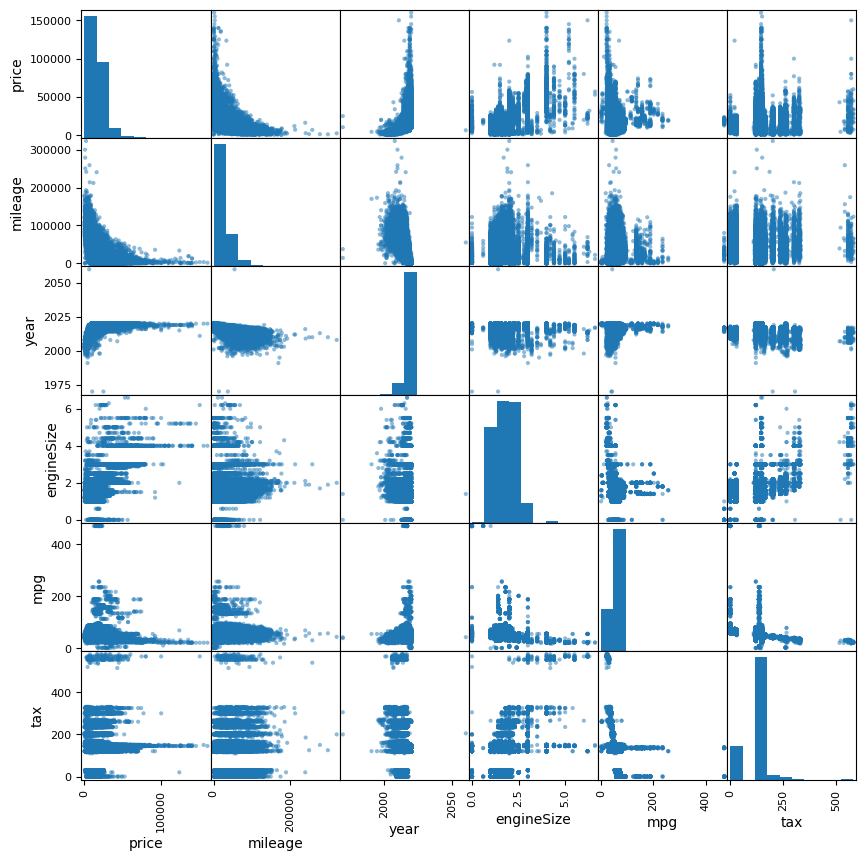

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Wir selektieren einige der Spalten unseres Dataframes...
df_scatter = df_num[['price', 'mileage', 'year','engineSize', 'mpg', 'tax']]
# ...und erzeugen die Scatter Plots
splot = scatter_matrix(df_scatter, figsize=(10,10));

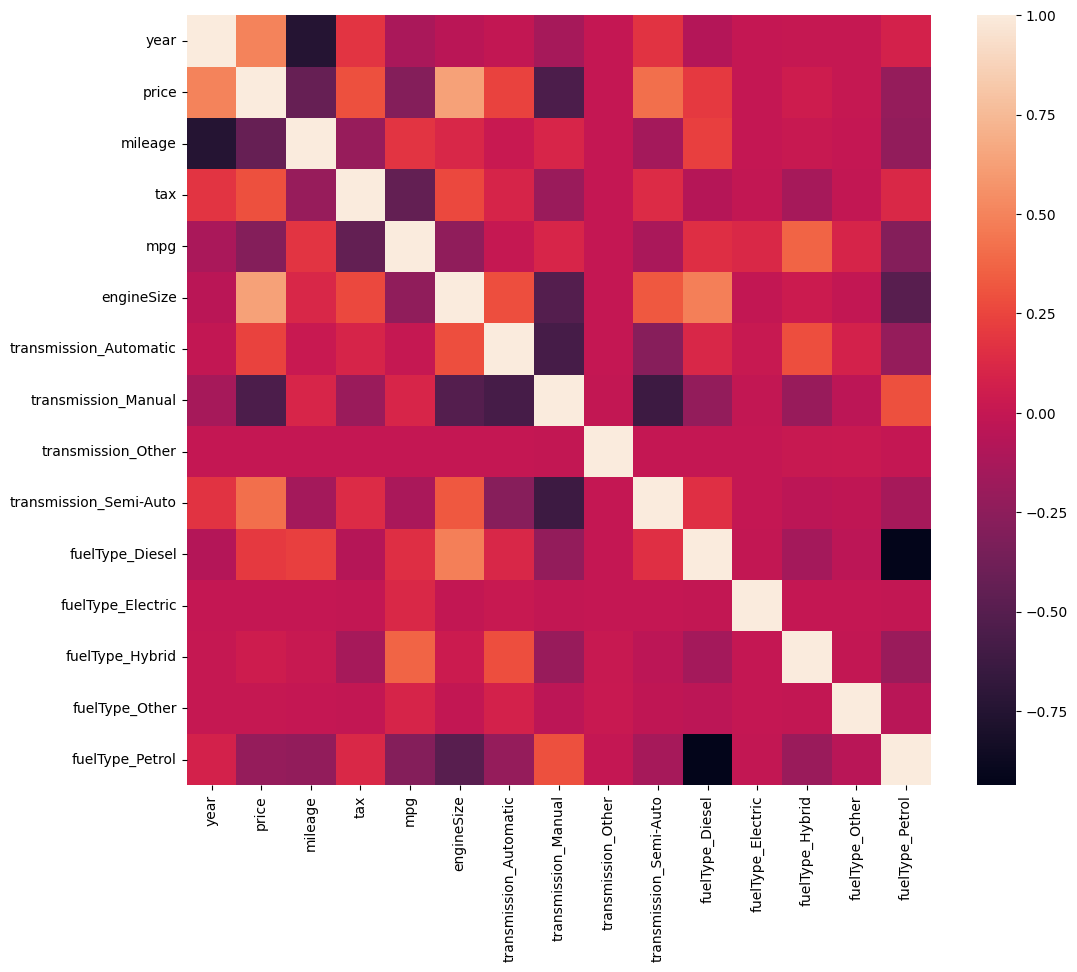

In [ ]:
import seaborn as sns
df_scatter = df_num[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']]
plt.figure(figsize=(12,10))
ax = sns.heatmap(df_scatter.corr())

C:\Users\K.Fitkau\AppData\Local\Temp\ipykernel_11904\2555487093.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


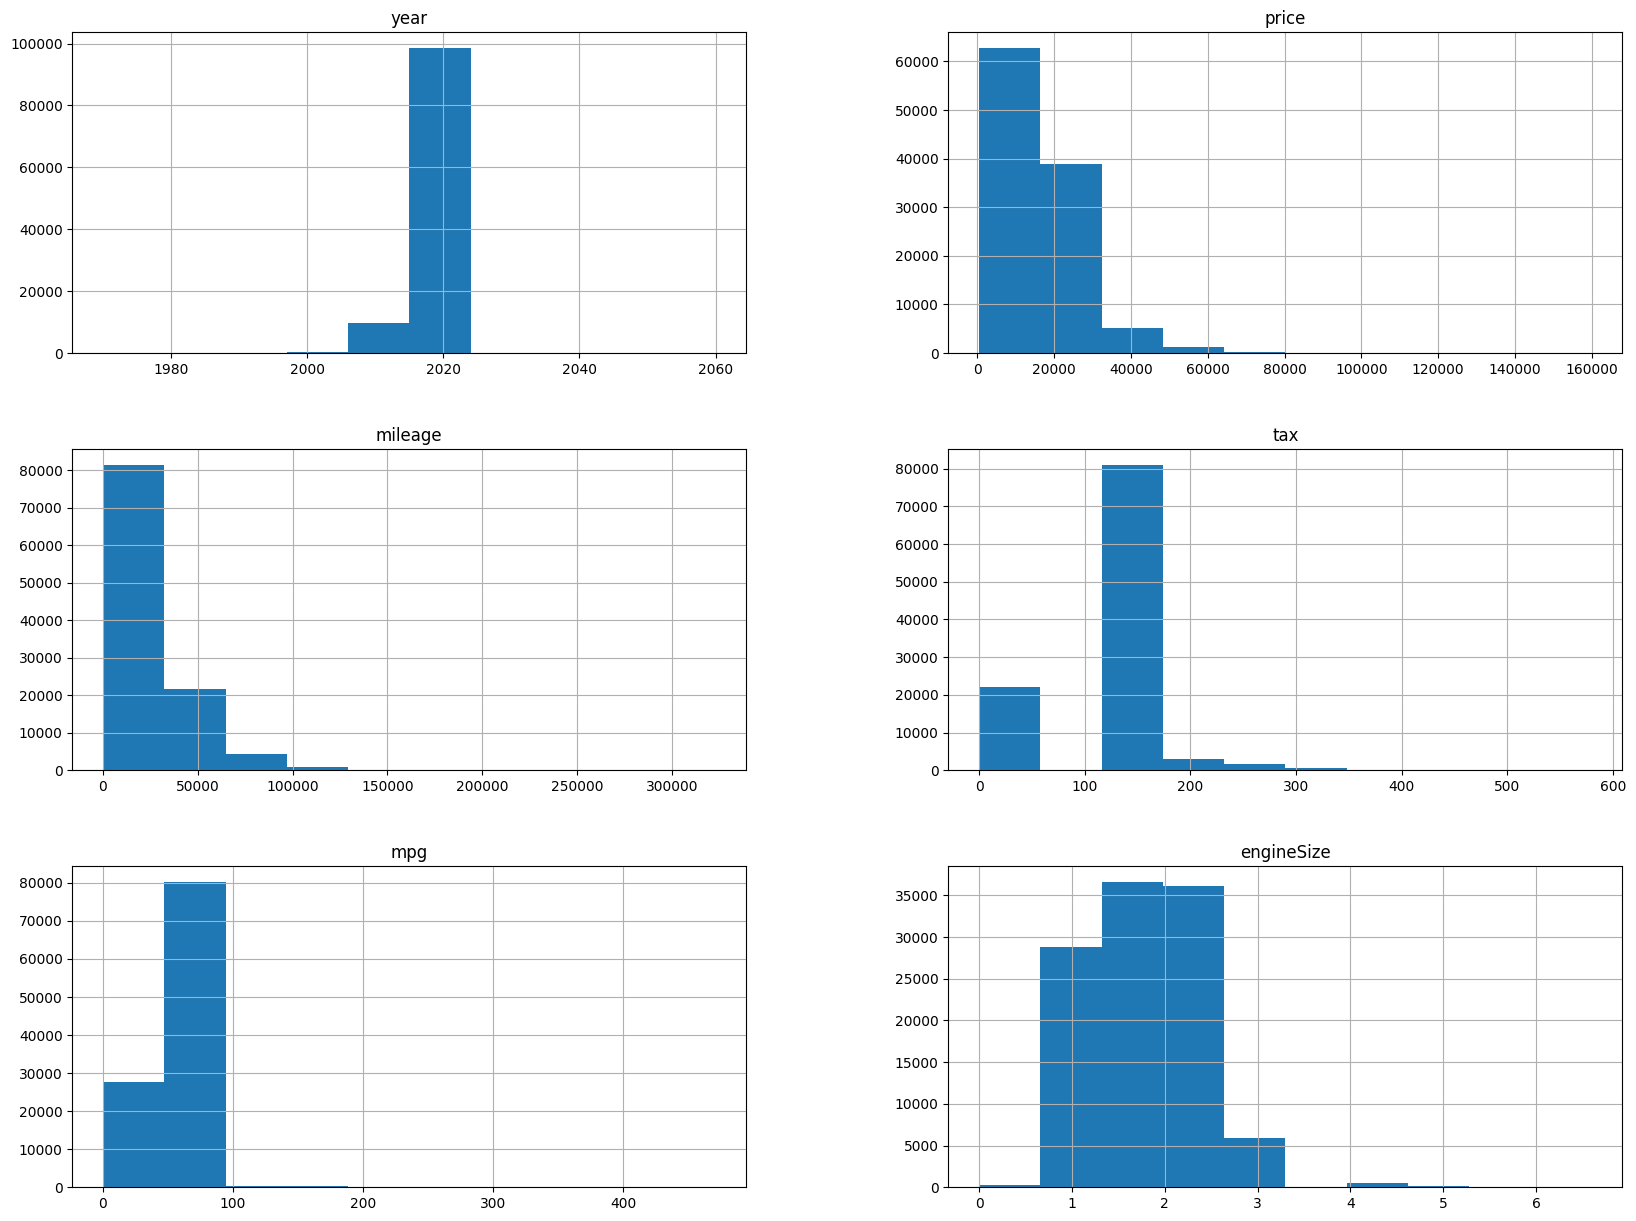

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Damit wir nicht nur graphisch die Bestätigung haben, sondern uns auch auf Zahlen stützen können. Rechnen wir den Korrelationskoeffizient aus. Dieser ist eine Kenngröße, die angibt, wie stark die Werte zweier Datenreihen  x  und  y  miteinander linear korrelieren. Der Wert des Korrelationskoeffizient liegt immer zwischen -1 und +1. Dabei bedeutet ein sehr niedriger (etwa  Korrelationskoeffizient < −0.8 ) oder ein sehr hoher Wert (etwa  Korrelationskoeffizient > 0.8 ), dass die Reihen korrelieren, es also einen statistischen Zusammenhang der Datenreihen gibt. Ein Wert von  Korrelationskoeffizient  um den Nullpunkt (etwa  −0.5 < Korrelationskoeffizient < 0.5) bedeutet, dass es keinen signifikanten Zusammenhang gibt. Cohen (1988) hat unter anderem für Korrelationen eine Konvention angegeben, die besagt, bei welchem Wert man eine Korrelation als gering, mittel oder hoch einstufen sollte:
* Korrelationskoeffizient = 0.1 für eine geringe Korrelation
* Korrelationskoeffizientr = 0.3 für eine mittlere Korrelatio
* Korrelationskoeffizient
r = 0.5 für eine hohe Korrelation

Für die Berechnung der Korrelationsmatrix mit der Pandas Funktion corr(), nehmen wir den Datensatz, der alle Merkmale enthält. Aus der berechneten Matrix selektieren wir die Spalte Price und geben die Korrelationskoeffizienten in absteigend sortierter Reihenfolge aus:

In [ ]:
# Wir delektieren aus dem DataFrame df_num nur die "numerischen" Spalten
df_select = df_num.select_dtypes(include=np.number)
corr_matrix = df_select.corr()
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
engineSize                0.631580
year                      0.497094
transmission_Semi-Auto    0.414238
tax                       0.295388
transmission_Automatic    0.239781
fuelType_Diesel           0.199732
fuelType_Hybrid           0.042555
fuelType_Other            0.003030
fuelType_Electric        -0.000187
transmission_Other       -0.001076
fuelType_Petrol          -0.212795
mpg                      -0.286580
mileage                  -0.427944
transmission_Manual      -0.546766
Name: price, dtype: float64

Da für uns die absolut größten Werte interessant sind, wenden wir die Betragsfunktion abs() auf die Werte an und geben die sortierte Liste erneut aus. Hier sehen wir, dass "engineSize", "transmission_Manual" in hohen Korrelation befinden mit dem Preis. Des Weiteren befinden sich "mileage", "transmission_Semi-Auto" und "year" in mittlerer Korrelation und "tax", "mpg", "transmission_Automatic", "fuelType_Petrol" und "fuelType_Diesel" in geringer Korrelation.

In [ ]:
corr_matrix["price"].abs().sort_values(ascending=False).head(15)

price                     1.000000
engineSize                0.631580
transmission_Manual       0.546766
year                      0.497094
mileage                   0.427944
transmission_Semi-Auto    0.414238
tax                       0.295388
mpg                       0.286580
transmission_Automatic    0.239781
fuelType_Petrol           0.212795
fuelType_Diesel           0.199732
fuelType_Hybrid           0.042555
fuelType_Other            0.003030
transmission_Other        0.001076
fuelType_Electric         0.000187
Name: price, dtype: float64

## 3.4 Daten selektieren und aufbereiten

Als nächstes wird dern Datensatz in 2 Teile aufgeteilt. In einen Trainingsdatensatz sowie einen Testdatensatz. Mit dem ersten wird das Modell trainiert. Mit dem zweiten Datensatz wird die trainierte Modellfunktion getestet. Mit diesem Ansatz wird das Problem des Overfittings (Überanpassung) adressieren. Es kann beim Trainieren des Modells nämlich dazu kommen, dass der Lern-Algorithmus die Modell-Parameter zu sehr auf den Trainingsdatensatz anpasst. Durch vorhalten eines separaten Datensatzes, der nicht zum Trainieren benutzt wird, kann dieses Problem erkannt werden.

Es ist üblich, etwa 1/5 bis 1/3 der Daten für den Trainingsdatensatz und die restlichen Daten für den Testdatensatz zu verwenden. Mit dem Parameter test_size wird der Anteil der Testdaten adressiert. Mit random_state wird der Zufallszahlengenerator initialisiert, über den die Datenpunkte ausgewählt werden. Legt man random_state fest, so wird immer die gleiche Aufteilung vorgenommen. Dies hat den Vorteil, dass die Analysen vergleichbar sind.

Zusätzlich zur Gesamtpreisvorhersage werde ich auch eine differenzierte Analyse durchführen, indem ich die Daten nach Automarken sortiere. Auf diese Weise kann ich Preisentwicklungen für jede Marke untersuchen. Die einzelnen Automarken haben oft ihre eigenen charakteristischen Eigenschaften und Besonderheiten, die sich auf den Preis auswirken können.

Um meine Zielsetzung zu erreichen, selektiere ich die Daten einmal für alle Marken im Gesamtprodukt und einmal die Daten für jede Marke einzeln

In [ ]:
from sklearn.model_selection import train_test_split

"""
Selektieren von Daten für alle Marken
"""
# Zielgröße Y
y = df_num['price']

# Einflussgröße X
X = df_num[['engineSize', 'transmission_Manual', 'year', 'mileage', 'transmission_Semi-Auto', 'tax', 'mpg', 'transmission_Automatic', 'fuelType_Petrol', 'fuelType_Diesel']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


"""
Selektieren von Daten für einzelne Marken
"""
companies = ['Mercedes', 'Bmw', 'Volkswagen', 'Hyundai', 'Ford', 'Skoda', 'Audi', 'Opel', 'Toyota']
d, y_companies, X_companies, companies_X_train, companies_X_test, companies_y_train, companies_y_test = [dict() for _ in range(7)]
for name in companies:

    #Erstelle einen neuen Dataframe aus der Marke
    d[name] = df_num.query(f"Company=='{name}'")

    # Zielgröße Y
    y_companies[name] = d[name]['price']

    # Einflussgröße X
    X_companies[name] = d[name][['engineSize', 'transmission_Manual', 'year', 'mileage', 'transmission_Semi-Auto', 'tax', 'mpg', 'transmission_Automatic', 'fuelType_Petrol', 'fuelType_Diesel']]

    companies_X_train[name], companies_X_test[name], companies_y_train[name], companies_y_test[name] = train_test_split(X_companies[name], y_companies[name], test_size=0.3, random_state=42)

## 3.5 Lineare Regression

Lineare Regression ist eine statistische Methode, die häufig zur Vorhersage von Beziehungen zwischen einer abhängigen Variablen und einer oder mehreren unabhängigen Variablen verwendet wird. Diese Funktion soll auf Grundlage eines oder mehrerer Merkmale eine Schätzung für den Preis des Fahrzeugs ausgeben. Diese Schätzung soll so ausfallen, dass sie möglichst gut zu den bestehenden Datenpunkten passt. Dies kann zum Beispiel genutzt werden, um einen Zielpreis für eine neue Anzeige zu berechnen oder um festzustellen, ob ein Angebot relativ teuer oder günstig ist. Um diesen Schätzer zu entwickeln, wird die Beziehungen untersucht, die während der Analysephase entwickelt wurde, und auf dieser Grundlage wird das lineare Regressionsmodell trainiert.

Die Funktionen zur linearen Regression wird aus dem Modul sklearn.linear_model entnommen. Zur besseren Übersicht wird die abhängige Variable auf y (bzw. y_test) zugewiesen, die unabhängige Variable auf X (bzw. X_test). Dementsprechend wird die abhängige Variable auf y_companies (bzw. companies_y_test) zugewiesen und die unabhängige Variable auf X_companies (bzw. companies_X_test)

Mit lin_reg_all bzw. _lin_reg[company name] wird ein Modell als Objekt der Klasse LinearRegression erzeugt und trainiert das Modell mit dem Aufruf fit(X,y) auf die Daten.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg_all = LinearRegression().fit(X_train, y_train)

_lin_reg = {}

for name in companies:
  _lin_reg[name] = LinearRegression().fit(companies_X_train[name], companies_y_train[name])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

def eval_model(model, X_test, y_test):
    avg_price = y_test.values.mean()
    print("Mittlerer Preis: %d EUR" % avg_price)
    pred = model.predict(X_test)
    pred_err = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    pred_err_pc = pred_err*100//avg_price
    print(f"Im Mittel liegt die Preisschätzung um {pred_err:.2f}€ oder {pred_err_pc:.1f}% daneben (R²={r2:.3f})")


In [ ]:
print("Alle Automarken: ")
eval_model(lin_reg_all, X_test, y_test)

for name in companies:
  print(f"\nAutomarke {name}")
  eval_model(_lin_reg[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 3378.37€ oder 19.0% daneben (R²=0.725)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 3768.88€ oder 15.0% daneben (R²=0.707)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 4450.34€ oder 19.0% daneben (R²=0.669)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 2326.71€ oder 13.0% daneben (R²=0.796)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 1973.54€ oder 15.0% daneben (R²=0.679)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 1733.07€ oder 13.0% daneben (R²=0.747)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1910.60€ oder 13.0% daneben (R²=0.827)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 3293.87€ oder 14.0% daneben (R²=0.810)

Automarke Opel
Mittlerer

## 3.6 Random Forest

Random Forest ist eine Ensemble-Lernmethode für Klassifizierung, Regression und andere Aufgaben, die durch die Konstruktion einer Vielzahl von Entscheidungsbäumen zur Trainingszeit funktioniert. Bei Klassifizierungsaufgaben ist die Ausgabe des Random Forest die Klasse, die von den meisten Bäumen ausgewählt wurde. Bei Regressionsaufgaben wird der Mittelwert oder die durchschnittliche Vorhersage der einzelnen Bäume zurückgegeben

Die Funktionen zum Random Forest-Klassifikations- und Regressionsverfahren wird aus dem Modul sklearn.ensemble entnommen. Auch hier erstmal mit den Standardparametern. Mit rfr_all bzw. rfr_companies[company name] wird ein Modell als Objekt der Klasse RandomForestRegressor erzeugt und trainiert das Modell mit dem Aufruf fit(X,y) auf die Daten.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_all = RandomForestRegressor().fit(X_train, y_train)
rfr_companies = {}

print("Alle Automarken: ")
eval_model(rfr_all, X_test, y_test)

for name in companies:
  rfr_companies[name] = RandomForestRegressor().fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(rfr_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 1749.62€ oder 10.0% daneben (R²=0.912)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 2022.33€ oder 8.0% daneben (R²=0.902)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 2012.68€ oder 8.0% daneben (R²=0.920)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 1230.96€ oder 7.0% daneben (R²=0.942)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 951.14€ oder 7.0% daneben (R²=0.815)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 955.88€ oder 7.0% daneben (R²=0.910)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1111.58€ oder 7.0% daneben (R²=0.942)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 1791.77€ oder 7.0% daneben (R²=0.946)

Automarke Opel
Mittlerer Preis: 1

## 3.7 DecisionTreeRegressor

Der DecisionTreeRegressor ist ein Algorithmus für maschinelles Lernen, der zur Lösung von Regressionsproblemen verwendet wird. Er basiert auf der Entscheidungsbaum-Methode und kann kontinuierliche numerische Werte vorhersagen. Im Gegensatz zum DecisionTreeClassifier, der für Klassifikationsprobleme eingesetzt wird, ist der DecisionTreeRegressor darauf spezialisiert, numerische Zielvariablen (abhängige Variablen) zu prognostizieren. Der DecisionTreeRegressor eignet sich gut für einfache Regressionsprobleme und kann auch als Basismodell in Ensemble-Methoden wie dem Random Forest oder Gradient Boosting verwendet werden. Allerdings kann er anfällig für Overfitting sein, wenn er nicht richtig reguliert wird. Daher ist es wichtig, Hyperparameter wie die maximale Baumtiefe oder die minimale Anzahl von Datenpunkten pro Blattknoten sorgfältig einzustellen, um die beste Leistung des Modells zu erzielen.

Die Funktionen zum DecisionTreeRegressor-Klassifikations- und Regressionsverfahren wird aus dem Modul sklearn.tree entnommen. Hier ebenso erstmal mit den Standardparametern. Mit dtr_all bzw. dtr_companies[company name] wird ein Modell als Objekt der Klasse DecisionTreeRegressor erzeugt und trainiert das Modell mit dem Aufruf fit(X,y) auf die Daten.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_all = DecisionTreeRegressor().fit(X_train, y_train)
dtr_companies = {}

print("Alle Automarken: ")
eval_model(dtr_all, X_test, y_test)

for name in companies:
  dtr_companies[name] = DecisionTreeRegressor().fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(dtr_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 2106.05€ oder 12.0% daneben (R²=0.860)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 2466.12€ oder 10.0% daneben (R²=0.846)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 2551.92€ oder 11.0% daneben (R²=0.864)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 1508.57€ oder 9.0% daneben (R²=0.909)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 1128.61€ oder 8.0% daneben (R²=0.788)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 1135.68€ oder 9.0% daneben (R²=0.858)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1364.02€ oder 9.0% daneben (R²=0.908)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 2250.25€ oder 9.0% daneben (R²=0.909)

Automarke Opel
Mittlerer Prei

## 3.8 Support Vector Regressor

Der Support Vector Regressor (SVR) ist ein Algorithmus für maschinelles Lernen, der in der Lage ist, Regressionsprobleme zu lösen. SVR basiert auf der gleichen Prinzipien wie Support Vector Machines (SVM), die für Klassifikationsaufgaben entwickelt wurden. Im Gegensatz zu herkömmlichen linearen Regressionsmodellen zielt SVR darauf ab, eine sogenannte "tube-shaped" Regressionslinie zu finden, anstatt eine einfache Linie durch die Datenpunkte zu ziehen.

SVR eignet sich besonders gut für Regressionsaufgaben, bei denen die Datenpunkte eine komplexe nichtlineare Beziehung aufweisen und wo eine robuste Modellierung erforderlich ist, um Ausreißer zu berücksichtigen. Die Wahl des richtigen Kernels und die Einstellung des Epsilon-Hyperparameters sind entscheidend für die Leistung des SVR-Modells. Wie bei anderen Regressionsmodellen sollte auch das SVR-Modell sorgfältig validiert und mit anderen Regressionsmethoden verglichen werden, um die beste Vorhersagegenauigkeit zu erzielen.

Die Funktionen zum Support Vector Regressor-Klassifikations- und Regressionsverfahren wird aus dem Modul sklearn.svm entnommen. Hier ebenso erstmal mit den Standardparametern. Mit svr_all bzw. svr_companies[company name] wird ein Modell als Objekt der Klasse SVR erzeugt und trainiert das Modell mit dem Aufruf fit(X,y) auf die Daten.

In [ ]:
from sklearn.svm import SVR

svr_all = SVR().fit(X_train, y_train)
svr_companies = {}

print("Alle Automarken: ")
eval_model(svr_all, X_test, y_test)

for name in companies:
  svr_companies[name] = SVR().fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(svr_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 6190.88€ oder 36.0% daneben (R²=0.119)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 6728.04€ oder 27.0% daneben (R²=0.090)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 7508.53€ oder 32.0% daneben (R²=0.059)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 5529.80€ oder 32.0% daneben (R²=0.105)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 4434.56€ oder 35.0% daneben (R²=0.017)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 3221.80€ oder 25.0% daneben (R²=0.169)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 4854.97€ oder 33.0% daneben (R²=0.020)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 7683.41€ oder 33.0% daneben (R²=0.039)

Automarke Opel
Mittlerer

## 3.9 KNN Regressor

Der KNN (k-Nearest Neighbors) Regressor ist ein Algorithmus für maschinelles Lernen, der für Regressionsprobleme verwendet wird. Es ist eine Variante des k-Nearest Neighbors Algorithmus, der normalerweise für Klassifikationsaufgaben eingesetzt wird. Der KNN Regressor basiert auf der Idee, dass ähnliche Datenpunkte ähnliche Zielwerte haben, und verwendet eine Gruppe von "k" nächsten Nachbarn, um den Vorhersagewert für einen neuen Datenpunkt zu ermitteln.

Obwohl der K-Nearest Neighbors-Algorithmus (KNN) im Allgemeinen bei Klassifizierungsproblemen verwendet wird, liefert er auch bei Regressionsproblemen sehr gute Ergebnisse.

Die Funktionen zum K-Nearest Neighbors-Algorithmus wird aus dem Modul sklearn.neighbors entnommen. Hier ebenso erstmal mit den Standardparametern. Mit knn_all bzw. knn_companies[company name] wird ein Modell als Objekt der Klasse KNeighborsRegressor erzeugt und trainiert das Modell mit dem Aufruf fit(X,y) auf die Daten.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_all = KNeighborsRegressor().fit(X_train, y_train)
knn_companies = {}

print("Alle Automarken: ")
eval_model(knn_all, X_test, y_test)

for name in companies:
  knn_companies[name] = KNeighborsRegressor().fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(knn_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 5222.83€ oder 30.0% daneben (R²=0.438)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4984.62€ oder 20.0% daneben (R²=0.498)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5204.71€ oder 22.0% daneben (R²=0.535)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3861.74€ oder 23.0% daneben (R²=0.550)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 4125.79€ oder 32.0% daneben (R²=0.138)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2690.78€ oder 21.0% daneben (R²=0.410)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 3931.87€ oder 27.0% daneben (R²=0.395)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5410.36€ oder 23.0% daneben (R²=0.475)

Automarke Opel
Mittlerer

# 4. Hyperparameter Tuning

Wie wir sehen sind einige Werte über zwischen 10-30% Abweichung. Eine mehr als 10%-ige Abweichung von Preis ist nicht unbedingt gut. Diese Problem versuchen wir in diesem Kapitel anzugehen. Im Bereich des maschinellen Lernens bezeichnet Hyperparameteroptimierung die Suche nach optimalen Hyperparametern. Ein Hyperparameter ist ein Parameter, der zur Steuerung des Trainingsalgorithmus verwendet wird und dessen Wert im Gegensatz zu anderen Parametern vor dem eigentlichen Training des Modells festgelegt werden muss.

Das Hyperparameter-Tuning ist ein wichtiger Prozess, um ein Modell optimal zu konfigurieren und seine Leistung zu maximieren. Es kann jedoch zeitaufwendig sein, da viele Modelle mit verschiedenen Hyperparameter-Kombinationen trainiert werden müssen.

Es ist ratsam, Methoden wie Kreuzvalidierung zu verwenden, um sicherzustellen, dass das Modell gut generalisiert und nicht nur auf die spezifischen Trainingsdaten überangepasst ist.

Gängige Methoden für das Hyperparameter-Tuning sind die Manuelle Suche, Grid Search, Random Search und Bayesian Optimization. Die "Manuelle Suche" ist zeitaufwendig und erfordert oft Erfahrung und Fachwissen, kann aber in einigen Fällen effektiv sein, wird jedoch hier nicht verwendet.

Ich möchte hier nur grob zeigen wie es aufgebaut wird, da bestimmmte Methoden zu lange benötigen.
Beispiel: *[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=0.490 total time=636.9min*<br>Deswegen wurden die default-Werte benutzt und ein wenig erweitert.

## 4.1 GridSearch

GridSearch ist eine einfache, aber effektive Methode des Hyperparameter-Tunings im maschinellen Lernen. Es handelt sich um eine systematische Suche über einen vordefinierten Suchraum von Hyperparameter-Kombinationen, um die besten Hyperparameter für ein Modell zu finden.

1.estimator: Die Modellinstanz muss übergeben werden, für die Hyperparameter überprüft werden.

2.params_grid: Das Dictionary-Objekt, das die Hyperparameter enthält

3.scoring: Bewertungsmetrik

4.cv: Anzahl der Kreuzvalidierungen

5.verbose: Detaillierter Ausdruck während GridSearchCV läuft

6.n_jobs: Anzahl der Prozesse, die für diese Aufgabe parallel laufen gelassen werden sollen.

best_params_ ist ein Attribut, das von vielen Hyperparameter-Tuning-Bibliotheken und -Algorithmen in Python verwendet wird, um die besten gefundenen Hyperparameter-Werte nach einer GridSearch oder anderen Suchmethoden zu speichern

In [ ]:
from sklearn.model_selection import GridSearchCV

### 4.1.1 LinearRegression

GridSearch ist eine effektive Methode des Hyperparameter-Tunings im maschinellen Lernen, aber es ist wichtig zu erkennen, dass sie nicht immer für jeden Algorithmus und jede Situation geeignet ist. Insbesondere für die lineare Regression kann die Verwendung von GridSearch ineffizient und unnötig sein.

Die lineare Regression ist ein einfacher Algorithmus, der eine lineare Beziehung zwischen den unabhängigen Variablen und der abhängigen Variablen annimmt. Es gibt nur wenige Hyperparameter, die bei der linearen Regression angepasst werden können

### 4.1.2 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 10, 20, 40],
    "max_features" : ["log2", "sqrt"]
}

rfr_gs = GridSearchCV(rfr_all, param_grid, cv = 5, verbose = 6, scoring = 'r2', n_jobs=-1)
rfr_gs.fit(X_train, y_train)

print(rfr_gs.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
rfr_gs_all = RandomForestRegressor(n_estimators = 200, max_depth = 20, max_features = 'log2').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(rfr_gs_all, X_test, y_test)
rfr2_gs_companies = {}

for name in companies:
  rfr2_gs_companies[name] = RandomForestRegressor(n_estimators = 200, max_depth = 20, max_features = 'log2').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(rfr2_gs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 1739.92€ oder 10.0% daneben (R²=0.914)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 2056.75€ oder 8.0% daneben (R²=0.896)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 2042.52€ oder 8.0% daneben (R²=0.918)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 1221.79€ oder 7.0% daneben (R²=0.944)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 914.33€ oder 7.0% daneben (R²=0.826)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 936.92€ oder 7.0% daneben (R²=0.917)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1148.19€ oder 8.0% daneben (R²=0.939)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 1817.55€ oder 7.0% daneben (R²=0.945)

Automarke Opel
Mittlerer Preis: 1

### 4.1.3 DecisionTreeRegressor

In [ ]:
param_grid = {
    "splitter":["best","random"],
    "max_depth" : [1,5,7,9,12],
    "min_samples_leaf":[1,3,5,7,10],
    "min_weight_fraction_leaf":[0.1,0.3,0.5],
    "max_features":["log2","sqrt",None],
    "max_leaf_nodes":[None,10,30,50]
}

dtr_gs = GridSearchCV(dtr_all, param_grid, cv = 5, verbose = 6, n_jobs=-1)
dtr_gs.fit(X_train, y_train)

print(dtr_gs.best_params_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [ ]:
dtr_gs_all = DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter='best').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(dtr_gs_all, X_test, y_test)
dtr_gs_companies = {}

for name in companies:
  dtr_gs_companies[name] = DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter='best').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(dtr_gs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4305.35€ oder 25.0% daneben (R²=0.523)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 6027.98€ oder 24.0% daneben (R²=0.294)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5458.44€ oder 23.0% daneben (R²=0.483)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3688.86€ oder 22.0% daneben (R²=0.564)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 3090.64€ oder 24.0% daneben (R²=0.414)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2473.67€ oder 19.0% daneben (R²=0.475)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 3433.08€ oder 23.0% daneben (R²=0.513)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 4634.56€ oder 20.0% daneben (R²=0.577)

Automarke Opel
Mittlerer

### 4.1.4 Support Vector Regressor

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svr_gs = GridSearchCV(svr_all, param_grid, cv = 5, verbose = 6, n_jobs=-1)
svr_gs.fit(X_train, y_train)

print(svr_gs.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svr_gs_all = SVR(C=100, gamma='scale', kernel='rbf').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(svr_gs_all, X_test, y_test)
svr_gs_companies = {}

for name in companies:
  svr_gs_companies[name] = SVR(C=100, gamma='scale', kernel='rbf').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(svr_gs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 5853.30€ oder 34.0% daneben (R²=0.222)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 5294.43€ oder 21.0% daneben (R²=0.328)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5541.04€ oder 24.0% daneben (R²=0.400)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 4663.32€ oder 27.0% daneben (R²=0.322)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 4110.72€ oder 32.0% daneben (R²=0.153)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2793.87€ oder 22.0% daneben (R²=0.349)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 4198.46€ oder 29.0% daneben (R²=0.286)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5949.30€ oder 25.0% daneben (R²=0.315)

Automarke Opel
Mittlerer

### 4.1.5 KNN Regressor

In [ ]:
param_grid= {
    'n_neighbors': [1,5,7,10,15,20],
    'weights': ['uniform','distance']
}

knn_gs = GridSearchCV(knn_all, param_grid, cv = 5, verbose = 6, n_jobs=-1)
knn_gs.fit(X_train, y_train)

print(knn_gs.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
knn_gs_all = KNeighborsRegressor(n_neighbors=10, weights='distance').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(knn_gs_all, X_test, y_test)
knn_gs_companies = {}

for name in companies:
  knn_gs_companies[name] = KNeighborsRegressor(n_neighbors=10, weights='distance').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(knn_gs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4970.35€ oder 29.0% daneben (R²=0.471)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4741.78€ oder 19.0% daneben (R²=0.516)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5046.26€ oder 22.0% daneben (R²=0.559)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3654.83€ oder 21.0% daneben (R²=0.579)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 3851.40€ oder 30.0% daneben (R²=0.214)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2533.60€ oder 20.0% daneben (R²=0.452)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 3704.20€ oder 25.0% daneben (R²=0.452)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5177.81€ oder 22.0% daneben (R²=0.515)

Automarke Opel
Mittlerer

## 4.2 Random Search

Random Search ist eine Methode des Hyperparameter-Tunings im maschinellen Lernen, die eine zufällige Suche über einen vordefinierten Suchraum von Hyperparameter-Kombinationen durchführt. Im Gegensatz zur systematischen Suche von GridSearch, die alle möglichen Kombinationen ausprobiert, wählt Random Search zufällig Hyperparameter-Werte aus dem Suchraum aus, um die optimale Kombination zu finden.
Der Hauptvorteil von Random Search ist seine Effizienz bei der Suche nach guten Hyperparameter-Werten. Da Random Search zufällig Hyperparameter-Werte auswählt, kann es sein, dass in jedem Durchlauf eine zufällig günstige Kombination gefunden wird. Allerdings ist Random Search nicht garantiert, die besten Hyperparameter-Werte zu finden, da es auf zufälliger Auswahl basiert. Es kann sein, dass einige vielversprechende Kombinationen nicht berücksichtigt werden, und es besteht immer das Risiko, dass Random Search nicht das absolute Optimum findet.

1.estimator: Die Modellinstanz muss übergeben werden, für die Hyperparameter überprüft werden.

2.params_grid: Das Dictionary-Objekt, das die Hyperparameter enthält

3.n_iter: Anzahl der Parametereinstellungen, die abgetastet werden

4.cv: Anzahl der Kreuzvalidierungen

5.verbose: Detaillierter Ausdruck während GridSearchCV läuft

6.random_state: Pseudozufallszahlengeneratorstatus, der für zufällige, gleichmäßige Stichproben aus Listen möglicher Werte anstelle von scipy.stats-Verteilungen verwendet wird.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### 4.2.1 LinearRegression

[Siehe 4.1.1](#scrollTo=uE1zyFsCwMeG&line=1&uniqifier=1)

### 4.2.2 Random Forest

In [ ]:
param_rs = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 10, 20, 40],
    "max_features" : ["log2", "sqrt"]
}

rfr_rs = RandomizedSearchCV(estimator=rfr_all, param_distributions=param_rs, n_iter=10, cv=5, random_state=42, verbose=6)
rfr_rs.fit(X_train, y_train)

print(rfr_rs.best_params_)

{'n_estimators': 50, 'max_features': 'log2', 'max_depth': 20}


In [ ]:
rfr_rs_all = RandomForestRegressor(n_estimators = 50, max_depth = 20, max_features = 'log2').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(rfr_rs_all, X_test, y_test)
rfr_rs_companies = {}

for name in companies:
  rfr_rs_companies[name] = RandomForestRegressor(n_estimators = 50, max_depth = 20, max_features = 'log2').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(rfr_rs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 1748.24€ oder 10.0% daneben (R²=0.914)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 2080.41€ oder 8.0% daneben (R²=0.895)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 2053.19€ oder 8.0% daneben (R²=0.918)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 1232.95€ oder 7.0% daneben (R²=0.943)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 921.45€ oder 7.0% daneben (R²=0.827)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 942.00€ oder 7.0% daneben (R²=0.915)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1159.01€ oder 8.0% daneben (R²=0.938)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 1828.12€ oder 7.0% daneben (R²=0.944)

Automarke Opel
Mittlerer Preis: 1

### 4.2.3 DecisionTreeRegressor

In [ ]:
param_rs = {
    "splitter":["best","random"],
    "max_depth" : [1,5,7,9,12],
    "min_samples_leaf":[1,3,5,7,10],
    "min_weight_fraction_leaf":[0.1,0.3,0.5],
    "max_features":["log2","sqrt",None],
    "max_leaf_nodes":[None,10,30,50]
}

dtr_rs = RandomizedSearchCV(estimator=dtr_all, param_distributions=param_rs, n_iter=10, cv=5, random_state=42, verbose=6)
dtr_rs.fit(X_train, y_train)

print(dtr_rs.best_params_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 10, 'max_leaf_nodes': 30, 'max_features': None, 'max_depth': 7}


In [ ]:
dtr_rs_all = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, min_samples_leaf=10, max_leaf_nodes=30, max_features=None, max_depth=7).fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(dtr_rs_all, X_test, y_test)
dtr_rs_companies = {}

for name in companies:
  dtr_rs_companies[name] = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, min_samples_leaf=10, max_leaf_nodes=30, max_features=None, max_depth=7).fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(dtr_rs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4287.55€ oder 25.0% daneben (R²=0.520)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4997.48€ oder 20.0% daneben (R²=0.471)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 4720.45€ oder 20.0% daneben (R²=0.609)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3338.15€ oder 19.0% daneben (R²=0.609)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 2691.60€ oder 21.0% daneben (R²=0.514)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2068.44€ oder 16.0% daneben (R²=0.599)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 2935.14€ oder 20.0% daneben (R²=0.595)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 4605.28€ oder 20.0% daneben (R²=0.574)

Automarke Opel
Mittlerer

### 4.2.4 Support Vector Regressor

In [ ]:
X_train_splitted = np.array_split(X_train, 4)
y_train_splitted = np.array_split(y_train, 4)
len(X_train_splitted[0])

18995

In [ ]:
param_rs = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svr_rs = RandomizedSearchCV(estimator=svr_all, param_distributions=param_rs, n_iter=8, cv=5, random_state=42, verbose=6)
svr_rs.fit(X_train_splitted[0], y_train_splitted[0])

print(svr_gs.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.029 total time=  14.3s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.036 total time=  14.2s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.055 total time=  15.6s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.041 total time=  14.9s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.028 total time=  14.6s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.040 total time=  21.8s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.047 total time=  22.8s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.067 total time=  21.4s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.056 total time=  21.6s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.037 total time=  21.1s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.042 total time=  14.4s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;,

In [ ]:
svr_rs_all = SVR(C=100, gamma='scale', kernel='rbf').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(svr_rs_all, X_test, y_test)
svr_rs_companies = {}

for name in companies:
  svr_rs_companies[name] = SVR(C=100, gamma='scale', kernel='rbf').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(svr_rs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 5853.30€ oder 34.0% daneben (R²=0.222)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 5294.43€ oder 21.0% daneben (R²=0.328)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5541.04€ oder 24.0% daneben (R²=0.400)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 4663.32€ oder 27.0% daneben (R²=0.322)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 4110.72€ oder 32.0% daneben (R²=0.153)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2793.87€ oder 22.0% daneben (R²=0.349)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 4198.46€ oder 29.0% daneben (R²=0.286)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5949.30€ oder 25.0% daneben (R²=0.315)

Automarke Opel
Mittlerer

### 4.2.5 KNN Regressor

In [ ]:
param_rs = {
    'n_neighbors': [1,5,7,10,15,20],
    'weights': ['uniform','distance']
}

knn_rs = RandomizedSearchCV(estimator=knn_all, param_distributions=param_rs, n_iter=10, cv=5, random_state=42, verbose=6)
knn_rs.fit(X_train, y_train)

print(knn_rs.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...n_neighbors=20, weights=uniform;, score=0.413 total time=   0.2s
[CV 2/5] END ...n_neighbors=20, weights=uniform;, score=0.415 total time=   0.3s
[CV 3/5] END ...n_neighbors=20, weights=uniform;, score=0.412 total time=   0.2s
[CV 4/5] END ...n_neighbors=20, weights=uniform;, score=0.410 total time=   0.2s
[CV 5/5] END ...n_neighbors=20, weights=uniform;, score=0.394 total time=   0.2s
[CV 1/5] END ..n_neighbors=15, weights=distance;, score=0.462 total time=   0.2s
[CV 2/5] END ..n_neighbors=15, weights=distance;, score=0.466 total time=   0.2s
[CV 3/5] END ..n_neighbors=15, weights=distance;, score=0.464 total time=   0.2s
[CV 4/5] END ..n_neighbors=15, weights=distance;, score=0.453 total time=   0.2s
[CV 5/5] END ..n_neighbors=15, weights=distance;, score=0.443 total time=   0.2s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.153 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;

In [ ]:
knn_rs_all = KNeighborsRegressor(weights='distance', n_neighbors=10).fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(knn_rs_all, X_test, y_test)
knn_rs_companies = {}

for name in companies:
  knn_rs_companies[name] = KNeighborsRegressor(weights='distance', n_neighbors=10).fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(knn_rs_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4970.35€ oder 29.0% daneben (R²=0.471)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4741.78€ oder 19.0% daneben (R²=0.516)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5046.26€ oder 22.0% daneben (R²=0.559)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3654.83€ oder 21.0% daneben (R²=0.579)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 3851.40€ oder 30.0% daneben (R²=0.214)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2533.60€ oder 20.0% daneben (R²=0.452)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 3704.20€ oder 25.0% daneben (R²=0.452)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5177.81€ oder 22.0% daneben (R²=0.515)

Automarke Opel
Mittlerer

## 4.3 Bayesian optimization

Bayesian Optimization ist eine fortschrittliche Methode des Hyperparameter-Tunings im maschinellen Lernen, die auf bayesianischen Wahrscheinlichkeitsmodellen basiert. Im Gegensatz zu GridSearch und Random Search, die eine systematische oder zufällige Suche durchführen, versucht Bayesian Optimization, eine gezielte und effiziente Suche nach den besten Hyperparameter-Werten zu ermöglichen.

Bayesian Optimization ist eine effiziente Methode des Hyperparameter-Tunings, da sie dazu neigt, aussichtsreiche Regionen des Suchraums zu erkennen und sich auf relevante Hyperparameter-Werte zu konzentrieren. Dies macht sie besonders gut für komplexe Modelle oder große Suchräume, wo die systematische GridSearch oder die zufällige Random Search zeitaufwändig oder unpraktisch sein könnten.

In [ ]:
from skopt import BayesSearchCV

### 4.3.1 LinearRegression

[Siehe 4.1.1](#scrollTo=uE1zyFsCwMeG&line=1&uniqifier=1)

### 4.3.2 Random Forest

In [ ]:
param_bayes = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 10, 20, 40],
    "max_features" : ["log2", "sqrt"]
}

bayes_search = BayesSearchCV(estimator=rfr_all, search_spaces=param_bayes, n_iter=10, cv=5, verbose=6, random_state=42)
bayes_search.fit(X_train, y_train)

print(bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=10, max_features=log2, n_estimators=50;, score=0.892 total time=   2.2s
[CV 2/5] END max_depth=10, max_features=log2, n_estimators=50;, score=0.885 total time=   2.1s
[CV 3/5] END max_depth=10, max_features=log2, n_estimators=50;, score=0.889 total time=   2.3s
[CV 4/5] END max_depth=10, max_features=log2, n_estimators=50;, score=0.870 total time=   2.2s
[CV 5/5] END max_depth=10, max_features=log2, n_estimators=50;, score=0.871 total time=   2.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.923 total time=  13.4s
[CV 2/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.913 total time=  13.2s
[CV 3/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.921 total time=  14.4s
[CV 4/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.900 total time=  14.2s
[CV 5/5] END max_depth=

In [ ]:
rfr_bayes_all = RandomForestRegressor(n_estimators = 100, max_depth = 20, max_features = 'sqrt').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(rfr_bayes_all, X_test, y_test)
rfr_bayes_companies = {}

for name in companies:
  rfr_bayes_companies[name] = RandomForestRegressor(n_estimators = 100, max_depth = 20, max_features = 'sqrt').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(rfr_bayes_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 1743.65€ oder 10.0% daneben (R²=0.914)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 2056.74€ oder 8.0% daneben (R²=0.897)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 2037.63€ oder 8.0% daneben (R²=0.918)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 1225.41€ oder 7.0% daneben (R²=0.944)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 909.39€ oder 7.0% daneben (R²=0.827)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 936.87€ oder 7.0% daneben (R²=0.917)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 1155.45€ oder 8.0% daneben (R²=0.939)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 1815.74€ oder 7.0% daneben (R²=0.945)

Automarke Opel
Mittlerer Preis: 1

### 4.3.3 DecisionTreeRegressor

In [ ]:
param_bayes = {
    "splitter":["best","random"],
    "max_depth" : [1,5,7,9,12],
    "min_samples_leaf":[1,3,5,7,10],
    "min_weight_fraction_leaf":[0.1,0.3,0.5],
    "max_features":["log2","sqrt",None],
    "max_leaf_nodes":[None,10,30,50]
}

dtr_bayes_search = BayesSearchCV(estimator=dtr_all, search_spaces=param_bayes, n_iter=10, cv=5, verbose=6, random_state=42)
dtr_bayes_search.fit(X_train, y_train)

print(dtr_bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=0.300 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=0.169 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=0.298 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=0.299 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=0.302 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_l

In [ ]:
dtr_bayes_all = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=None, max_features=None, max_depth=7).fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(dtr_bayes_all, X_test, y_test)
dtr_bayes_companies = {}

for name in companies:
  dtr_bayes_companies[name] = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=None, max_features=None, max_depth=7).fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(dtr_bayes_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4287.55€ oder 25.0% daneben (R²=0.520)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4997.48€ oder 20.0% daneben (R²=0.471)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 4720.45€ oder 20.0% daneben (R²=0.609)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3338.15€ oder 19.0% daneben (R²=0.609)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 2691.60€ oder 21.0% daneben (R²=0.514)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2068.44€ oder 16.0% daneben (R²=0.599)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 2935.14€ oder 20.0% daneben (R²=0.595)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 4605.28€ oder 20.0% daneben (R²=0.574)

Automarke Opel
Mittlerer

### 4.3.4 Support Vector Regressor

In [ ]:
param_bayes = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svr_bayes_search = BayesSearchCV(estimator=svr_all, search_spaces=param_bayes, n_iter=5, cv=5, verbose=6, random_state=42)
svr_bayes_search.fit(X_train_splitted[0], y_train_splitted[0])

print(svr_bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.042 total time=  14.9s
[CV 2/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.036 total time=  15.1s
[CV 3/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.015 total time=  14.2s
[CV 4/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.026 total time=  14.4s
[CV 5/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.032 total time=  14.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=100.0, gamma=scale, kernel=rbf;, score=0.238 total time=  13.8s
[CV 2/5] END ..C=100.0, gamma=scale, kernel=rbf;, score=0.227 total time=  13.7s
[CV 3/5] END ..C=100.0, gamma=scale, kernel=rbf;, score=0.205 total time=  14.1s
[CV 4/5] END ..C=100.0, gamma=scale, kernel=rbf;, score=0.217 total time=  13.8s
[CV 5/5] END ..C=100.0, gamma=scale, kernel=rbf;, score=0.199 total time=  13.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

In [ ]:
svr_bayes_all = SVR(C=100, gamma='scale', kernel='rbf').fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(svr_bayes_all, X_test, y_test)
svr_bayes_companies = {}

for name in companies:
  svr_bayes_companies[name] = SVR(C=100, gamma='scale', kernel='rbf').fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(svr_bayes_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 5853.30€ oder 34.0% daneben (R²=0.222)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 5294.43€ oder 21.0% daneben (R²=0.328)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5541.04€ oder 24.0% daneben (R²=0.400)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 4663.32€ oder 27.0% daneben (R²=0.322)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 4110.72€ oder 32.0% daneben (R²=0.153)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2793.87€ oder 22.0% daneben (R²=0.349)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 4198.46€ oder 29.0% daneben (R²=0.286)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5949.30€ oder 25.0% daneben (R²=0.315)

Automarke Opel
Mittlerer

### 4.3.5 KNN Regressor

In [ ]:
param_knn = {
    'n_neighbors': [1,5,7,10,15,20],
    'weights': ['uniform','distance']
}

knn_bayes_search = BayesSearchCV(estimator=knn_all, search_spaces=param_knn, n_iter=10, cv=5, verbose=6, random_state=42)
knn_bayes_search.fit(X_train, y_train)

print(knn_bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.432 total time=   0.2s
[CV 2/5] END ....n_neighbors=7, weights=uniform;, score=0.438 total time=   0.2s
[CV 3/5] END ....n_neighbors=7, weights=uniform;, score=0.440 total time=   0.2s
[CV 4/5] END ....n_neighbors=7, weights=uniform;, score=0.431 total time=   0.2s
[CV 5/5] END ....n_neighbors=7, weights=uniform;, score=0.414 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...n_neighbors=15, weights=uniform;, score=0.425 total time=   0.2s
[CV 2/5] END ...n_neighbors=15, weights=uniform;, score=0.427 total time=   0.2s
[CV 3/5] END ...n_neighbors=15, weights=uniform;, score=0.423 total time=   0.2s
[CV 4/5] END ...n_neighbors=15, weights=uniform;, score=0.417 total time=   0.2s
[CV 5/5] END ...n_neighbors=15, weights=uniform;, score=0.403 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

In [ ]:
knn_bayes_all = KNeighborsRegressor(weights='distance', n_neighbors=15).fit(X_train, y_train)

print("Alle Automarken: ")
eval_model(knn_bayes_all, X_test, y_test)
knn_bayes_companies = {}

for name in companies:
  knn_bayes_companies[name] = KNeighborsRegressor(weights='distance', n_neighbors=15).fit(companies_X_train[name], companies_y_train[name])
  print(f"\nAutomarke {name}")
  eval_model(knn_bayes_companies[name], companies_X_test[name], companies_y_test[name])

Alle Automarken: 
Mittlerer Preis: 16931 EUR
Im Mittel liegt die Preisschätzung um 4961.47€ oder 29.0% daneben (R²=0.468)

Automarke Mercedes
Mittlerer Preis: 24451 EUR
Im Mittel liegt die Preisschätzung um 4736.34€ oder 19.0% daneben (R²=0.513)

Automarke Bmw
Mittlerer Preis: 22878 EUR
Im Mittel liegt die Preisschätzung um 5063.77€ oder 22.0% daneben (R²=0.554)

Automarke Volkswagen
Mittlerer Preis: 16757 EUR
Im Mittel liegt die Preisschätzung um 3666.20€ oder 21.0% daneben (R²=0.572)

Automarke Hyundai
Mittlerer Preis: 12637 EUR
Im Mittel liegt die Preisschätzung um 3827.33€ oder 30.0% daneben (R²=0.227)

Automarke Ford
Mittlerer Preis: 12557 EUR
Im Mittel liegt die Preisschätzung um 2517.01€ oder 20.0% daneben (R²=0.460)

Automarke Skoda
Mittlerer Preis: 14351 EUR
Im Mittel liegt die Preisschätzung um 3720.04€ oder 25.0% daneben (R²=0.449)

Automarke Audi
Mittlerer Preis: 22904 EUR
Im Mittel liegt die Preisschätzung um 5210.95€ oder 22.0% daneben (R²=0.510)

Automarke Opel
Mittlerer

# 5. Ergebnisse

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def display_scores(y_test, y_pred):
    r2_scores = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mse = np.sqrt(mse)
    print(f"r2_score: {r2_scores}")
    print(f"MSE: {mse}\n")

In [ ]:
#Linear Regression
print('Linear Regression Scores')
prediction = lin_reg_all.predict(X_test)
display_scores(y_test, prediction)

#Random Forest Regressor
models_rfr = {'None': rfr_all, "Gridsearch": rfr_gs_all, "RandomSearch": rfr_rs_all, "Bayesian optimization": rfr_bayes_all}
print("Random Forest Regressor Scores")
for model in models_rfr:
    print("-----------------------------")
    print(f"Model: {model}")
    print("-----------------------------")
    if str(model) == "rfr_all":
        prediction = rfr_all.predict(X_test)
        display_scores(y_test, prediction)
    else:
        for name in companies:
            print(f"Automarke: {name}")
            prediction = models_rfr[model].predict(companies_X_test[name])
            display_scores(companies_y_test[name], prediction)

#DecisionTreeRegressor
models_dtr = {'None': dtr_all, "Gridsearch": dtr_gs_all, "RandomSearch": dtr_rs_all, "Bayesian optimization": dtr_bayes_all}
print("DecisionTreeRegressor Scores")
for model in models_dtr:
    print("-----------------------------")
    print(f"Model: {model}")
    print("-----------------------------")
    if str(model) == "dtr_all":
        prediction = dtr_all.predict(X_test)
        display_scores(y_test, prediction)
    else:
        for name in companies:
            print(f"Automarke: {name}")
            prediction = models_dtr[model].predict(companies_X_test[name])
            display_scores(companies_y_test[name], prediction)

#Support Vector Regressor
models_svr = {'None': svr_all, "Gridsearch": svr_gs_all, "RandomSearch": svr_rs_all, "Bayesian optimization": svr_bayes_all}
print("Support Vector Regressor Scores")
for model in models_svr:
    print("-----------------------------")
    print(f"Model: {model}")
    print("-----------------------------")
    if str(model) == "svr_all":
        prediction = svr_all.predict(X_test)
        display_scores(y_test, prediction)
    else:
        for name in companies:
            print(f"Automarke: {name}")
            prediction = models_svr[model].predict(companies_X_test[name])
            display_scores(companies_y_test[name], prediction)

#KNN Regressor
models_knn = {'None': knn_all, "Gridsearch": knn_gs_all, "RandomSearch": knn_rs_all, "Bayesian optimization": knn_bayes_all}
print("KNN Regressor")
for model in models_knn:
    print("-----------------------------")
    print(f"Model: {model}")
    print("-----------------------------")
    if str(model) == "knn_all":
        prediction = knn_all.predict(X_test)
        display_scores(y_test, prediction)
    else:
        for name in companies:
            print(f"Automarke: {name}")
            prediction = models_knn[model].predict(companies_X_test[name])
            display_scores(companies_y_test[name], prediction)

Linear Regression Scores
r2_score: 0.7250641974609122
MSE: 5182.265166041777

Random Forest Regressor Scores
-----------------------------
Model: None
-----------------------------
Automarke: Mercedes
r2_score: 0.9577737617920428
MSE: 2333.888854448274

Automarke: Bmw
r2_score: 0.9480850560545172
MSE: 2586.4586851654176

Automarke: Volkswagen
r2_score: 0.9578064773514808
MSE: 1600.224346746514

Automarke: Hyundai
r2_score: 0.9535861536344326
MSE: 1308.794523350476

Automarke: Ford
r2_score: 0.8993733811159961
MSE: 1481.5243503746137

Automarke: Skoda
r2_score: 0.9321155829358412
MSE: 1702.0214518241537

Automarke: Audi
r2_score: 0.9542759260136224
MSE: 2527.0831201977508

Automarke: Opel
r2_score: 0.8597766534833502
MSE: 1345.0294327796064

Automarke: Toyota
r2_score: 0.97824381943173
MSE: 913.0886805652195

-----------------------------
Model: Gridsearch
-----------------------------
Automarke: Mercedes
r2_score: 0.9455058469281474
MSE: 2651.3308614142443

Automarke: Bmw
r2_score: 0.9

# 6. Fazit und Ausblick

Die Gebrauchtwagenanalyse wurde mit verschiedenen Regressionsmodellen durchgeführt, um die Leistungsfähigkeit der Modelle zu bewerten. Die Evaluation erfolgte anhand zweier wichtiger Metriken: dem Bestimmtheitsmaß (r2_score) und dem mittleren quadratischen Fehler (MSE). Je höher der r2_score und je niedriger der MSE, desto besser ist die Leistung des Modells.<br><br>
Linear Regression:
r2_score: 0.7251<br>
MSE: 5182.27<br>
Das lineare Regressionsmodell erreicht einen mittelmäßigen r2_score und einen relativ hohen MSE, was darauf hindeutet, dass die Vorhersageleistung verbesserungsfähig ist.
<br><br>
Random Forest Regressor:<br>
Für jede Automarke wurden eigene Modelle erstellt:<br>
Mercedes: r2_score: 0.9578, MSE: 2333.89<br>
BMW: r2_score: 0.9481, MSE: 2586.46<br>
Volkswagen: r2_score: 0.9578, MSE: 1600.22<br>
Hyundai: r2_score: 0.9536, MSE: 1308.79<br>
Ford: r2_score: 0.8994, MSE: 1481.52<br>
Skoda: r2_score: 0.9321, MSE: 1702.02<br>
Audi: r2_score: 0.9543, MSE: 2527.08<br>
Opel: r2_score: 0.8598, MSE: 1345.03<br>
Toyota: r2_score: 0.9782, MSE: 913.09<br>
Die Random Forest Modelle liefern im Allgemeinen sehr gute Ergebnisse mit hohen r2_scores und niedrigen MSE-Werten. Sie zeigen eine gute Vorhersageleistung für verschiedene Automarken.<br>
<br>
DecisionTreeRegressor:<br>
Für jede Automarke wurden eigene Modelle erstellt:<br>
Mercedes: r2_score: 0.9539, MSE: 2438.82<br>
BMW: r2_score: 0.9463, MSE: 2631.74<br>
Volkswagen: r2_score: 0.9509, MSE: 1726.23<br>
Hyundai: r2_score: 0.9682, MSE: 1083.25<br>
Ford: r2_score: 0.8859, MSE: 1577.65<br>
Skoda: r2_score: 0.8593, MSE: 2450.37<br>
Audi: r2_score: 0.9390, MSE: 2918.90<br>
Opel: r2_score: 0.8455, MSE: 1412.06<br>
Toyota: r2_score: 0.9728, MSE: 1020.62<br>
Die Entscheidungsbaummodelle erreichen gute Ergebnisse, aber im Vergleich zu den Random Forest Modellen sind ihre Vorhersageleistungen leicht schlechter.
<br><br>
Support Vector Regressor:<br>
Für jede Automarke wurden eigene Modelle erstellt:<br>
Mercedes: r2_score: -0.4870, MSE: 13849.90<br>
BMW: r2_score: -0.2542, MSE: 12712.95<br>
Volkswagen: r2_score: 0.2003, MSE: 6966.76<br>
Hyundai: r2_score: 0.0010, MSE: 6071.89<br>
Ford: r2_score: 0.0671, MSE: 4510.91<br>
Skoda: r2_score: 0.2241, MSE: 5754.02<br>
Audi: r2_score: -0.2665, MSE: 13299.96<br>
Opel: r2_score: -1.1499, MSE: 5266.58<br>
Toyota: r2_score: -0.0606, MSE: 6375.26<br>
Die Support Vector Regression Modelle zeigen im Allgemeinen eine schwache Leistung mit negativen r2_scores und hohen MSE-Werten. Diese Modelle passen möglicherweise nicht gut zu den Daten.<br>

KNN Regressor:<br>
Für jede Automarke wurden eigene Modelle erstellt:<br>
Mercedes: r2_score: 0.3576, MSE: 9103.02<br>
BMW: r2_score: 0.5465, MSE: 7644.09<br>
Volkswagen: r2_score: 0.6458, MSE: 4636.65<br>
Hyundai: r2_score: 0.0527, MSE: 5912.72<br>
Ford: r2_score: 0.1086, MSE: 4409.45<br>
Skoda: r2_score: 0.4962, MSE: 4636.47<br>
Audi: r2_score: 0.5760, MSE: 7695.31<br>
Opel: r2_score: -1.8204, MSE: 6032.25<br>
Toyota: r2_score: 0.2605, MSE: 5323.52<br>

Die KNN-Modelle zeigen gemischte Ergebnisse mit einigen guten r2_scores, aber auch einigen negativen Werten und relativ hohen MSE-Werten.
<br>
Fazit:
Die Random Forest Modelle liefern im Allgemeinen die besten Vorhersageergebnisse für die meisten Automarken, da sie sowohl hohe r2_scores als auch niedrige MSE-Werte aufweisen. Die Decision Tree Modelle sind etwas schlechter als Random Forest, aber immer noch akzeptabel. Die Leistung der linearen Regression und KNN-Modelle ist vergleichsweise gering, während die Support Vector Regression Modelle die schlechtesten Ergebnisse zeigen.
<br>
Es ist wichtig zu beachten, dass die Ergebnisse möglicherweise durch die Wahl der Hyperparameter und die Datenvorverarbeitung beeinflusst wurden. Eine weitere Optimierung der Hyperparameter und eine sorgfältige Datenbereinigung könnten zu verbesserten Ergebnissen führen.

# 7. Quellen

* [1] Dr. Günter Daniel Rey, Wertebereich von Korrelationen, URL: http://www.methoden-psychologie.de/wertebereich_korrelationen.html
* [2] ARTEM SELEZNEV, bmwPricePrediction, URL: https://www.kaggle.com/code/artsel288/bmwpriceprediction
* [3] Hr. Giefers, 05_Preise.ipynb -> ML Kurs

# 8. Eidesstattliche Erklärung

Siehe ZIP Ordner